<a href="https://colab.research.google.com/github/AZhuk30/ADS500B/blob/main/Final_Team_Project_Introduction_House_sales(Madison%2C_Alex_and_Gagandeep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Imporing Libraries - Initiated by AZ 11/11/24 11:56AM
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [11]:
#Import the data from the file house_sales.csv into a Pandas Series object in Python. - Initiated by AZ 11/11/24 12:10PM
url = "https://raw.githubusercontent.com/Deepking1996/FinalProject/refs/heads/main/house_sales.csv?token=GHSAT0AAAAAAC2T6FQ523MWSBYUWZNRVY2MZ2DV7YA"
house = pd.read_csv(url)
print(house)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

In [12]:
# Import data from house_sales.csv file into pandas
# house = pd.read_csv('/path/to/your/file/house_sales.csv')
#Import the data from the file house_sales.csv into a Pandas Series object in Python. - Initiated by AZ 11/11/24 12:10PM
url = 'https://raw.githubusercontent.com/Deepking1996/FinalProject/refs/heads/main/house_sales.csv?token=GHSAT0AAAAAAC2T6FQ523MWSBYUWZNRVY2MZ2DV7YA'
house = pd.read_csv(url)
print(house)
# Dimesnions of house dataset
house.shape

SyntaxError: invalid syntax (<ipython-input-12-11ca7060c1f6>, line 1)

In [13]:
# House data types
house.dtypes
# Summary of what below data types mean: int67 (used for whole numbers i.e, iD, categorical values(waterfront, view, condition) and years (year built and year renovated)) float64- floating-point type; continuous numerical data i.e. price, sq-ft_living, and lat/long(coordinates): object - used for storing string or text based data (may want to convert to datetime for easier manipulation)


,0
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,float64
sqft_lot,float64
floors,float64
waterfront,int64
view,int64


In [14]:
# Head of data (10)
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [15]:
# House.Date converision (string -> numeric)
house['date'] = pd.to_datetime(house['date'], format='%Y%m%dT%H%M%S')
print(house['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]


In [16]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [20]:
#Previewing house_sales data - Initiated by AZ 11/11/24 12:15PM
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
#Previewing house_sales data - Initiated by AZ 11/11/24 12:18PM
house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [22]:
#Identification of missing data - Initiated by AZ 11/11/24 12:20PM
missing_values = house.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [ ]:
#As we can see the only columns that have missing values are (Bedrooms, bathrooms, sqft_living and sqft_lot)- Initiated by AZ 11/11/24 12:29PM
#We will be filling missing data with mean and median.


In [23]:
# We will work on restorting missing values
# For numeric columns, we'll fill missing values with the median. - Initiated by AZ 11/11/24 12:20PM
numeric_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
for col in numeric_columns:
    if house[col].isnull().sum() > 0:
        house[col].fillna(house[col].median(), inplace=True)

<ipython-input-23-655fb9be6ac7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house[col].fillna(house[col].median(), inplace=True)


In [25]:
# We will also convert date column to a datetime type - Initiated by AZ 11/11/24 12:20PM
house['date'] = pd.to_datetime(house['date'])

In [26]:
#We will verify that all missing values are handled - Initiated by AZ 11/11/24 12:20PM
missing_values_after = house.isnull().sum()
print("\nMissing values per column after handling:\n", missing_values_after)


Missing values per column after handling:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [27]:
print(house.head()) # - Initiated by AZ 11/11/24 12:20PM

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1  6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2  5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3  2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4  1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955    

In [28]:
#From describe function we can inspect each indiviudal column for outliers: - Initiated by AZ 11/11/24 1:07PM
house.describe().round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,2014-10-29 04:38:01.959931648,540088.14,3.35,2.12,2072.80,14814.65,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
min,1.000102e+06,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,2014-07-22 00:00:00,321950.00,3.00,1.75,1450.00,5140.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,2014-10-16 00:00:00,450000.00,3.00,2.25,1920.00,7620.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,2015-02-17 00:00:00,645000.00,4.00,2.50,2510.00,10404.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,2015-05-27 00:00:00,7700000.00,33.00,8.00,12050.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00
std,2.876566e+09,NaN,367127.20,0.91,0.75,891.94,40504.19,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18


In [29]:
#Inspecting for Outliers - Initiated by AZ 11/11/24 4:27PM
most_expensive_house = house.loc[house['price'].idxmax()]
print(most_expensive_house)

id                        6762700020
date             2014-10-13 00:00:00
price                      7700000.0
bedrooms                         6.0
bathrooms                        8.0
sqft_living                  12050.0
sqft_lot                     27600.0
floors                           2.5
waterfront                         0
view                               3
condition                          4
grade                             13
sqft_above                      8570
sqft_basement                   3480
yr_built                        1910
yr_renovated                    1987
zipcode                        98102
lat                          47.6298
long                        -122.323
sqft_living15                   3940
sqft_lot15                      8800
Name: 7252, dtype: object


In [30]:
#Inspecting for Outliers - Initiated by AZ 11/11/24 4:27PM
most_bathrooms_house = house.loc[house['bathrooms'].idxmax()]
print(most_bathrooms_house)

id                        6762700020
date             2014-10-13 00:00:00
price                      7700000.0
bedrooms                         6.0
bathrooms                        8.0
sqft_living                  12050.0
sqft_lot                     27600.0
floors                           2.5
waterfront                         0
view                               3
condition                          4
grade                             13
sqft_above                      8570
sqft_basement                   3480
yr_built                        1910
yr_renovated                    1987
zipcode                        98102
lat                          47.6298
long                        -122.323
sqft_living15                   3940
sqft_lot15                      8800
Name: 7252, dtype: object


In [31]:
#Inspecting for Outliers, Found Bedrooms outlier (33), using median will change it to normal - Initiated by AZ 11/11/24 4:27PM
most_bedrooms_house = house.loc[house['bedrooms'].idxmax()]
print(most_bedrooms_house)

top_10_most_bedrooms = house.nlargest(10, 'bedrooms')
print(top_10_most_bedrooms)



id                        2402100895
date             2014-06-25 00:00:00
price                       640000.0
bedrooms                        33.0
bathrooms                       1.75
sqft_living                   1620.0
sqft_lot                      6000.0
floors                           1.0
waterfront                         0
view                               0
condition                          5
grade                              7
sqft_above                      1040
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
Name: 15870, dtype: object
               id       date      price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25   640000.0      33.0       1.75       1620.0   
13314   627300145 2014-08-14  1148000.0   

In [32]:
#Continuing on expecting for outliers, inspecting bedrooms, replacing 33 bedrooms outlier with the meadian - Initiated by AZ 11/11/24 4:47PM
median_bedrooms = house['bedrooms'].median()
house.loc[house['bedrooms'] == 33, 'bedrooms'] = median_bedrooms

most_bedrooms_house = house.loc[house['bedrooms'].idxmax()]
print(most_bedrooms_house)
#So now the most bedrooms house has is 10 -> - Initiated by AZ 11/11/24 4:43PM

id                         627300145
date             2014-08-14 00:00:00
price                      1148000.0
bedrooms                        10.0
bathrooms                       5.25
sqft_living                   4590.0
sqft_lot                     10920.0
floors                           1.0
waterfront                         0
view                               2
condition                          3
grade                              9
sqft_above                      2500
sqft_basement                   2090
yr_built                        2008
yr_renovated                       0
zipcode                        98004
lat                          47.5861
long                        -122.113
sqft_living15                   2730
sqft_lot15                     10400
Name: 13314, dtype: object


In [33]:
#Continuing on expecting for outliers, inspecting sqft_living - No outliers - Initiated by AZ 11/11/24 4:47PM
top_10_most_sqft_living = house.nlargest(10, 'sqft_living')
print(top_10_most_sqft_living)

               id       date      price  bedrooms  bathrooms  sqft_living  \
7252   6762700020 2014-10-13  7700000.0       6.0       8.00      12050.0   
3914   9808700762 2014-06-11  7062500.0       5.0       4.50      10040.0   
8092   1924059029 2014-06-17  4668000.0       5.0       6.75       9640.0   
4411   2470100110 2014-08-04  5570000.0       5.0       5.75       9200.0   
14556  2303900035 2014-06-11  2888000.0       5.0       6.25       8670.0   
18302  6072800246 2014-07-02  3300000.0       5.0       6.25       8020.0   
1164   1247600105 2014-10-20  5110800.0       5.0       5.25       8010.0   
1448   8907500070 2015-04-13  5350000.0       5.0       5.00       8000.0   
13411  2426039123 2015-01-30  2415000.0       5.0       4.75       7880.0   
19858  2524069078 2015-01-22  2700000.0       4.0       4.00       7850.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7252    27600.0     2.5           0     3  ...     13        8570   
3914    37325.

In [34]:
#Continuing on expecting for outliers, inspecting sqft_lot - Given the zip code the large sqft_lot can be explained by Zip Codes - Initiated by AZ 11/11/24 4:47PM
top_10_most_sqft_lot = house.nlargest(10, 'sqft_lot')
print(top_10_most_sqft_lot)

               id       date      price  bedrooms  bathrooms  sqft_living  \
1719   1020069017 2015-03-27   700000.0       4.0       1.00       1300.0   
17319  3326079016 2015-05-04   190000.0       2.0       1.00        710.0   
7647   2623069031 2014-05-21   542500.0       5.0       3.25       3010.0   
3949    722069232 2014-09-05   998000.0       4.0       3.25       3770.0   
4441   3626079040 2014-07-30   790000.0       2.0       3.00       2560.0   
6691   2624089007 2015-03-20  1998000.0       2.0       2.50       3900.0   
7077   2724079090 2015-01-05  1650000.0       4.0       3.25       3920.0   
9714    225079036 2015-01-07   937500.0       4.0       4.00       5545.0   
20452  1125079111 2015-04-15  1600000.0       4.0       5.50       6530.0   
4540   2522029039 2014-09-29   550000.0       3.0       2.00       3650.0   

        sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1719   1651359.0     1.0           0     3  ...      6        1300   
17319  11647

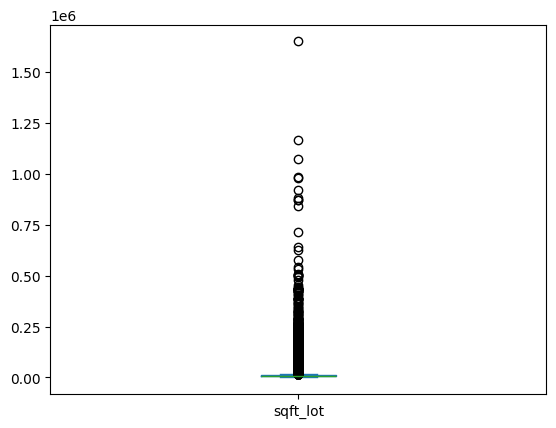

In [35]:
import matplotlib.pyplot as plt
house['sqft_lot'].plot(kind='box')
plt.show()

In [36]:
#Continuing on expecting for outliers, inspecting floors - No outliers - Initiated by AZ 11/11/24 4:47PM
top_10_most_floors = house.nlargest(10, 'floors')
print(top_10_most_floors)

               id       date      price  bedrooms  bathrooms  sqft_living  \
875    6306400140 2014-06-12  1095000.0       0.0       0.00       3064.0   
10077  1972202010 2014-08-01   435000.0       3.0       3.00       1440.0   
11594  3180100023 2015-01-30   544000.0       3.0       2.50       1760.0   
14885  8673400177 2015-04-02   525000.0       3.0       3.00       1730.0   
15424  1702900664 2015-04-16   479000.0       2.0       2.50       1730.0   
18477  1346300150 2014-10-20  3300000.0       8.0       4.00       7710.0   
20308  1972200426 2014-09-18   525000.0       2.0       2.75       1310.0   
20772  1972200428 2014-06-25   563500.0       3.0       2.50       1400.0   
31     2426039314 2014-12-01   280000.0       3.0       1.50       1190.0   
63     9528102996 2014-12-07   549000.0       3.0       1.75       1540.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
875      4764.0     3.5           0     2  ...      7        3064   
10077    1350.

In [37]:
#Continuing on expecting for outliers, inspecting waterfront - No outliers - Initiated by AZ 11/11/24 5:07PM
top_10_most_waterfront = house.nlargest(10, 'waterfront')
print(top_10_most_waterfront)

              id       date      price  bedrooms  bathrooms  sqft_living  \
49     822039084 2015-03-11  1350000.0       3.0       2.50       2753.0   
230   8096000060 2015-04-13   655000.0       2.0       1.75       1450.0   
246   2025069065 2014-09-29  2400000.0       4.0       2.50       3650.0   
264   2123039032 2014-10-27   369900.0       1.0       2.25        760.0   
300   3225069065 2014-06-24  3075000.0       4.0       5.00       4550.0   
457   2122039094 2014-11-26   705000.0       3.0       3.00       1970.0   
540    622049114 2015-02-18  2125000.0       3.0       2.50       5403.0   
656   3760500116 2014-11-20  3070000.0       3.0       2.50       3930.0   
1081  7567600045 2014-08-27   825000.0       2.0       1.00       1150.0   
1152  4055701200 2015-04-21  1955000.0       4.0       2.75       3120.0   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
49     65005.0     1.0           1     2  ...      9        2165   
230     7620.0     2.0     

In [38]:
#Continuing on expecting for outliers, inspecting view - No outliers - Initiated by AZ 11/11/24 5:07PM
top_10_most_view = house.nlargest(10, 'view')
print(top_10_most_view)

             id       date      price  bedrooms  bathrooms  sqft_living  \
21   2524049179 2014-08-26  2000000.0       3.0       2.75       3050.0   
58   7922800400 2014-08-27   951000.0       5.0       3.25       3250.0   
230  8096000060 2015-04-13   655000.0       2.0       1.75       1450.0   
246  2025069065 2014-09-29  2400000.0       4.0       2.50       3650.0   
264  2123039032 2014-10-27   369900.0       1.0       2.25        760.0   
300  3225069065 2014-06-24  3075000.0       4.0       5.00       4550.0   
312  1860600135 2014-05-02  2384000.0       5.0       2.50       3650.0   
409  1560930070 2014-09-11   840000.0       4.0       3.50       2840.0   
540   622049114 2015-02-18  2125000.0       3.0       2.50       5403.0   
582  2998800125 2014-07-01   730000.0       2.0       2.25       1920.0   

     sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21    44867.0     1.0           0     4  ...      9        2330   
58    14342.0     2.0           0     4 

In [39]:
#Continuing on expecting for outliers, inspecting sqft_basement - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_sqft_basement = house.nlargest(10, 'sqft_basement')
print(top_10_most_sqft_basement)

               id       date      price  bedrooms  bathrooms  sqft_living  \
8092   1924059029 2014-06-17  4668000.0       5.0       6.75       9640.0   
12777  1225069038 2014-05-05  2280000.0       3.0       8.00       1920.0   
15482   624069108 2014-08-12  3200000.0       4.0       3.25       7000.0   
7252   6762700020 2014-10-13  7700000.0       6.0       8.00      12050.0   
10085  7767000060 2014-09-12  1900000.0       5.0       4.25       6510.0   
4411   2470100110 2014-08-04  5570000.0       5.0       5.75       9200.0   
5049   7856410430 2014-05-30  1385000.0       6.0       2.75       5700.0   
21344  8835770170 2014-08-22  1488000.0       5.0       6.00       6880.0   
7035    853200010 2014-07-01  3800000.0       5.0       5.50       7050.0   
6628   3322049005 2014-09-30   850000.0       4.0       2.75       5440.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8092    13068.0     1.0           1     4  ...     12        4820   
12777  307752.

In [40]:
#Continuing on expecting for outliers, inspecting yr_built - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_yr_built = house.nlargest(10, 'yr_built')
print(top_10_most_yr_built)

               id       date      price  bedrooms  bathrooms  sqft_living  \
643    9385200045 2015-05-12   729500.0       3.0       2.50       1660.0   
1763   1832100030 2014-06-25   597326.0       4.0       4.00       3570.0   
2687   3076500830 2014-10-29   385195.0       1.0       2.25        710.0   
4154   8077100031 2015-04-22   631000.0       3.0       2.25       1670.0   
7526   9520900210 2014-12-31   614285.0       5.0       2.75       2730.0   
8039   1250200495 2014-06-24   455000.0       2.0       1.50       1200.0   
8425    558100090 2015-03-12   628000.0       5.0       2.25       2600.0   
14215  8156600210 2015-03-26  1285000.0       5.0       3.50       2980.0   
14489  2770601530 2014-08-26   500000.0       2.0       2.25       1570.0   
14925  2770602360 2015-04-21   671000.0       4.0       2.75       1890.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
643      1091.0     3.0           0     1  ...      9        1530   
1763     8250.

In [41]:
#Continuing on expecting for outliers, inspecting yr_renovated - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_yr_renovated = house.nlargest(10, 'yr_renovated')
print(top_10_most_yr_renovated)

               id       date      price  bedrooms  bathrooms  sqft_living  \
2295   8712100320 2014-07-28   585000.0       5.0       2.75       2350.0   
3156   6821100195 2015-03-31   830000.0       4.0       3.00       2020.0   
4240   6071800100 2015-03-27   815000.0       6.0       3.00       2860.0   
5683   2202500255 2015-03-05   335000.0       3.0       2.25       1210.0   
7097   9141100005 2014-10-28   285000.0       4.0       3.50       2770.0   
7417   8665900328 2015-01-23   459000.0       4.0       3.00       1900.0   
7958   9282800065 2015-03-29   203000.0       3.0       1.75       1190.0   
8692   8835401250 2015-05-06  1485000.0       6.0       2.25       4430.0   
11599  7284900030 2014-05-22   850000.0       4.0       3.25       3090.0   
11633   461004730 2015-04-06   717000.0       3.0       1.00       1150.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2295     7620.0     1.5           0     0  ...      8        1520   
3156     7620.

In [42]:
#Continuing on expecting for outliers, inspecting zipcode - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_zipcode = house.nlargest(10, 'zipcode')
print(top_10_most_zipcode)

              id       date      price  bedrooms  bathrooms  sqft_living  \
91    5036300431 2015-03-11  1099880.0       5.0       2.75       3520.0   
274   4235400186 2014-11-24   331000.0       3.0       1.75       1080.0   
551   1373800295 2014-10-13  1450000.0       3.0       3.00       4380.0   
611   2321300390 2014-11-05   650000.0       3.0       2.00       1870.0   
628   7010700292 2014-10-09   543500.0       3.0       2.25       1270.0   
631    582000135 2014-06-22   565000.0       2.0       1.75       1330.0   
822   2021200370 2014-09-01  1100000.0       3.0       2.00       3010.0   
1029  1370804430 2015-03-05   543115.0       3.0       2.25       1380.0   
1035  2021201000 2014-05-23   980000.0       4.0       3.00       3680.0   
1050  2771101200 2014-05-17   410000.0       3.0       2.00       1700.0   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
91      6353.0     2.0           0     0  ...     10        3520   
274     1306.0     1.0     

In [43]:
#Continuing on expecting for outliers, inspecting lat - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_lat = house.nlargest(10, 'lat')
print(top_10_most_lat)

               id       date     price  bedrooms  bathrooms  sqft_living  \
306    7280300196 2015-04-03  550000.0       4.0       2.75       1800.0   
15766  2644300005 2015-04-12  407500.0       4.0       2.50       1900.0   
17464  5500200010 2014-10-14  389950.0       3.0       1.75       1580.0   
6055    507100020 2015-03-09  270000.0       3.0       1.00       1920.0   
6814    507100005 2015-03-10  285000.0       4.0       2.00       2120.0   
12959  8165100035 2014-12-03  245560.0       2.0       1.50       1260.0   
15852   217700050 2014-10-30  395000.0       3.0       2.25       1780.0   
3696   4022900837 2014-06-13  350000.0       3.0       2.25       1820.0   
12558  2644900149 2014-12-18  364000.0       2.0       1.50       1650.0   
18025  7280300375 2015-01-22  536000.0       5.0       2.25       2650.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
306      7750.0     1.0           0     0  ...      8        1400   
15766    7620.0     2.0  

In [44]:
#Continuing on expecting for outliers, inspecting long - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_long = house.nlargest(10, 'long')
print(top_10_most_long)

               id       date     price  bedrooms  bathrooms  sqft_living  \
2927   8649401270 2015-04-30  167000.0       1.0       1.00        780.0   
4203   1437500015 2014-07-09  150000.0       3.0       0.75        490.0   
13072  1437500035 2014-10-10  155000.0       2.0       1.00       1010.0   
10898  8649401000 2014-10-22  241000.0       2.0       1.75       1070.0   
13249  8649400410 2015-04-17  375000.0       3.0       1.75       2140.0   
14615  8649400790 2015-01-13  160000.0       3.0       1.00       1340.0   
6089   5062300280 2015-04-16  150000.0       3.0       1.00        890.0   
10095  7805600070 2014-11-11  200000.0       2.0       1.75       1320.0   
2589   5061300030 2014-05-08  134000.0       2.0       1.50        980.0   
16941  2626119028 2015-03-23  160000.0       3.0       1.00       1140.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2927    10235.0     1.5           0     0  ...      6         780   
4203    38500.0     1.5  

In [45]:
#Continuing on expecting for outliers, inspecting sqft_living15 - No outliers - Initiated by AZ 11/11/24 5:13PM
top_10_most_sqft_living15 = house.nlargest(10, 'sqft_living15')
print(top_10_most_sqft_living15)

               id       date      price  bedrooms  bathrooms  sqft_living  \
19858  2524069078 2015-01-22  2700000.0       4.0       4.00       7850.0   
10373  3303850390 2014-12-12  2983000.0       5.0       5.50       7400.0   
1123   7237501180 2014-06-25  1200000.0       4.0       1.75       3990.0   
5451   7237501190 2014-10-10  1780000.0       4.0       3.25       4890.0   
16430   715010130 2015-02-02  1750000.0       6.0       4.25       5860.0   
20563   715010110 2014-08-04  1240420.0       5.0       3.25       5790.0   
20830   715010140 2014-10-02  1750000.0       5.0       3.25       5790.0   
21540   715010530 2015-01-13  1881580.0       5.0       3.50       4410.0   
11871  8835800350 2015-01-12  1950000.0       4.0       3.25       7420.0   
1530   4054510270 2014-08-27  1250000.0       4.0       3.75       3830.0   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
19858   89651.0     2.0           0     0  ...     12        7850   
10373   18898.

In [46]:
#Continuing on expecting for outliers, inspecting sqft_lot15 - No outliers - Initiated by AZ 11/11/24 5:24PM
top_10_most_sqft_lot15 = house.nlargest(10, 'sqft_lot15')
print(top_10_most_sqft_lot15)

               id       date      price  bedrooms  bathrooms  sqft_living  \
9714    225079036 2015-01-07   937500.0       4.0       4.00       5545.0   
20452  1125079111 2015-04-15  1600000.0       4.0       5.50       6530.0   
13464  3420069060 2014-11-07   790000.0       3.0       2.25       2640.0   
8664   3226079059 2014-10-19   549950.0       3.0       1.75       2930.0   
3801   1550000463 2014-08-26   637000.0       4.0       3.50       3080.0   
1719   1020069017 2015-03-27   700000.0       4.0       1.00       1300.0   
19156  1020069042 2014-10-01   858000.0       4.0       3.50       4370.0   
6691   2624089007 2015-03-20  1998000.0       2.0       2.50       3900.0   
15620  2225079030 2014-12-12   180000.0       2.0       1.00        960.0   
21431  2725079018 2014-05-09   800000.0       3.0       3.25       3540.0   

        sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
9714    871200.0     2.0           0     0  ...     11        3605   
20452   8712

In [47]:
#Outliers checking is done - Initiated by AZ 11/11/24 5:13PM
house.describe().round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,2014-10-29 04:38:01.959931648,540088.14,3.35,2.12,2072.80,14814.65,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
min,1.000102e+06,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,2014-07-22 00:00:00,321950.00,3.00,1.75,1450.00,5140.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,2014-10-16 00:00:00,450000.00,3.00,2.25,1920.00,7620.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,2015-02-17 00:00:00,645000.00,4.00,2.50,2510.00,10404.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,2015-05-27 00:00:00,7700000.00,10.00,8.00,12050.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00
std,2.876566e+09,NaN,367127.20,0.89,0.75,891.94,40504.19,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18


In [48]:
#Reduction of repetitive data - Initiated by AZ 11/11/24 5:36PM
duplicates = house[house.duplicated(keep=False)]
print(duplicates)
# No duplicates found

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [49]:
#Saving new file - # Initiated by AZ 11/11/24 5:33PM
house.to_csv('cleaned_house.csv', index=False)

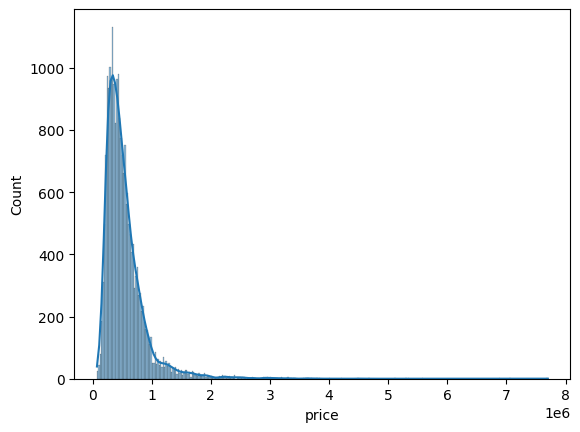

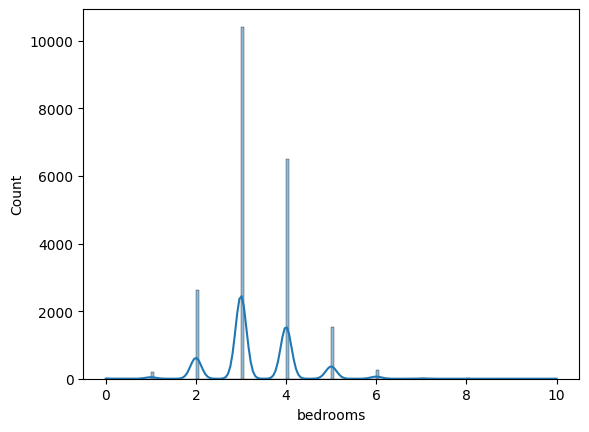

In [50]:
# Histogram of house price and bedroom
sns.histplot(house['price'], kde=True)
plt.show()
sns.histplot(house['bedrooms'], kde=True)
plt.show()

In [51]:
# Aggregate by price and ZIP code
average_price_by_zip = house.groupby('zipcode')['price'].mean()

# Set float format to display prices without scientific format
pd.options.display.float_format = '{:,.2f}'.format

# Print price by ZIP
print(average_price_by_zip)


zipcode
98001     280,804.69
98002     234,284.04
98003     294,111.28
98004   1,355,927.08
98005     810,164.88
            ...     
98177     676,185.39
98178     310,612.76
98188     289,078.35
98198     302,878.88
98199     791,820.81
Name: price, Length: 70, dtype: float64


In [52]:
# Aggregate sqft by number of bedrooms
average_sqft_by_bedrooms = house.groupby('bedrooms')['sqft_living'].mean()
print(average_sqft_by_bedrooms)

bedrooms
0.00    1,858.36
1.00      929.47
2.00    1,269.48
3.00    1,837.99
4.00    2,525.33
5.00    3,011.04
6.00    3,156.15
7.00    3,654.12
8.00    3,875.83
9.00    3,764.00
10.00   3,706.67
Name: sqft_living, dtype: float64


In [53]:
# Aggregate date by price
average_date_by_price = house.groupby('price')['date'].mean(0)
average_date_by_price = average_date_by_price.sort_values(ascending=True)

# Print
print(average_date_by_price)

price
459,990.00   2014-05-02
436,110.00   2014-05-02
287,200.00   2014-05-02
588,500.00   2014-05-02
257,950.00   2014-05-02
                ...    
724,500.00   2015-05-13
242,150.00   2015-05-13
204,750.00   2015-05-13
554,990.00   2015-05-13
479,349.00   2015-05-14
Name: date, Length: 4028, dtype: datetime64[ns]


In [54]:
# Feature construction - property age at time of sale
# Extract year from date column
house['sale_year'] = house['date'].dt.year

# Calculate property age at sale
house['property_age'] = house['sale_year'] - house['yr_built']
print(house[['sale_year', 'property_age']].head())

   sale_year  property_age
0       2014            59
1       2014            63
2       2015            82
3       2014            49
4       2015            28


In [55]:
# Feature construction- Total rooms as the sum of bedrooms and bathrooms
house['total_rooms'] = house['bedrooms'] + house['bathrooms']
print(house[['bedrooms', 'bathrooms', 'total_rooms']].head())

   bedrooms  bathrooms  total_rooms
0      3.00       1.00         4.00
1      3.00       2.25         5.25
2      2.00       1.00         3.00
3      4.00       3.00         7.00
4      3.00       2.00         5.00


In [56]:
# Feature construction - Ratio of living area to lot size
house['living_lot_ratio'] = house['sqft_living'] / house['sqft_lot']
print(house[['sqft_living', 'sqft_lot', 'living_lot_ratio']].head())

   sqft_living  sqft_lot  living_lot_ratio
0     1,180.00  5,650.00              0.21
1     2,570.00  7,242.00              0.35
2       770.00 10,000.00              0.08
3     1,960.00  5,000.00              0.39
4     1,680.00  8,080.00              0.21


In [57]:
# Binning for price and bedroom
# Binning bedrooms into categories
house['bedroom_category'] = pd.cut(house['bedrooms'], bins=[0, 2, 4, 6, 8, 10], labels=['1-2', '3-4', '5-6', '7-8', '9-10'])
print(house[['bedrooms', 'bedroom_category']].head())

   bedrooms bedroom_category
0      3.00              3-4
1      3.00              3-4
2      2.00              1-2
3      4.00              3-4
4      3.00              3-4


In [58]:
# Binning price into quantile-based categories
house['price_category'] = pd.qcut(house['price'], q=3, labels=['Low', 'Medium', 'High'])
print(house[['price', 'price_category']].head())

       price price_category
0 221,900.00            Low
1 538,000.00         Medium
2 180,000.00            Low
3 604,000.00           High
4 510,000.00         Medium


In [62]:
# Defining categories for variables programmatically - Gagandeep Singh 11/14/24

# List of categorical variables
categorical_values = ['id', 'date', 'waterfront', 'view', 'zipcode']

# List of ordinal variables - variables that have a natural order
ordinal_values = ['bedrooms', 'bathrooms', 'condition', 'grade']

# Numerical variables separated into continuous and discrete types
numerical_values = {
    'continuous': ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
    'discrete': ['floors', 'yr_built', 'yr_renovated']
}

# Displaying the classification
classification_summary = {
    "Categorical Variables": categorical_values,
    "Ordinal Variables": ordinal_values,
    "Numerical Variables": numerical_values
}

# Print classification summary
for category, variables in classification_summary.items():
    print(f"{category}:")
    print(variables)
    print()


Categorical Variables:
['id', 'date', 'waterfront', 'view', 'zipcode']

Ordinal Variables:
['bedrooms', 'bathrooms', 'condition', 'grade']

Numerical Variables:
{'continuous': ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], 'discrete': ['floors', 'yr_built', 'yr_renovated']}



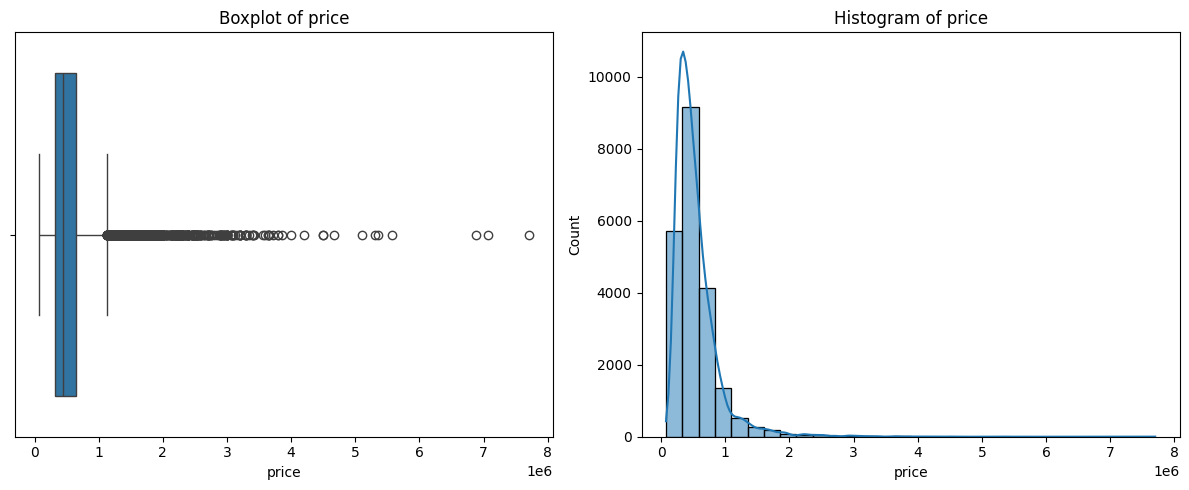

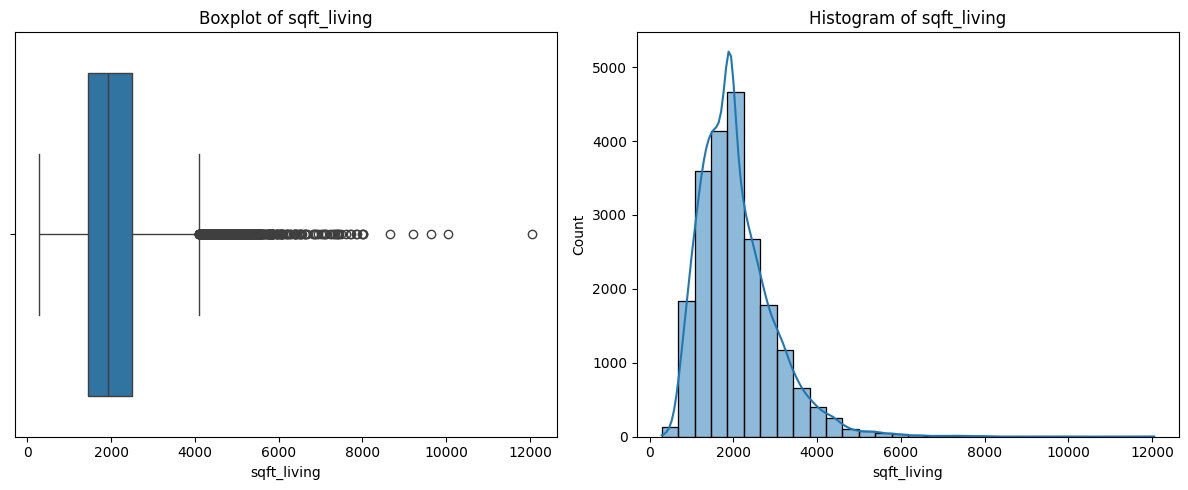

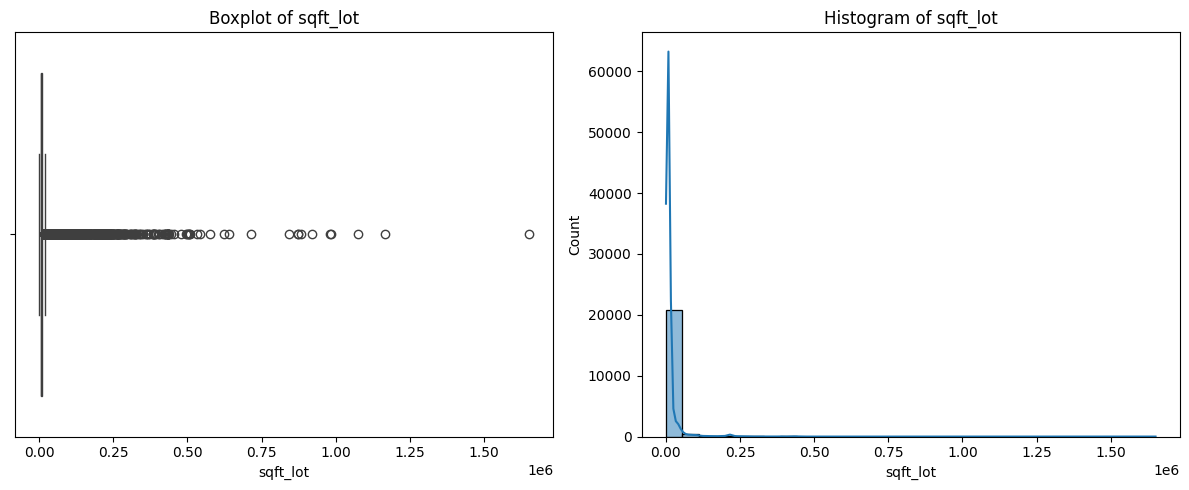

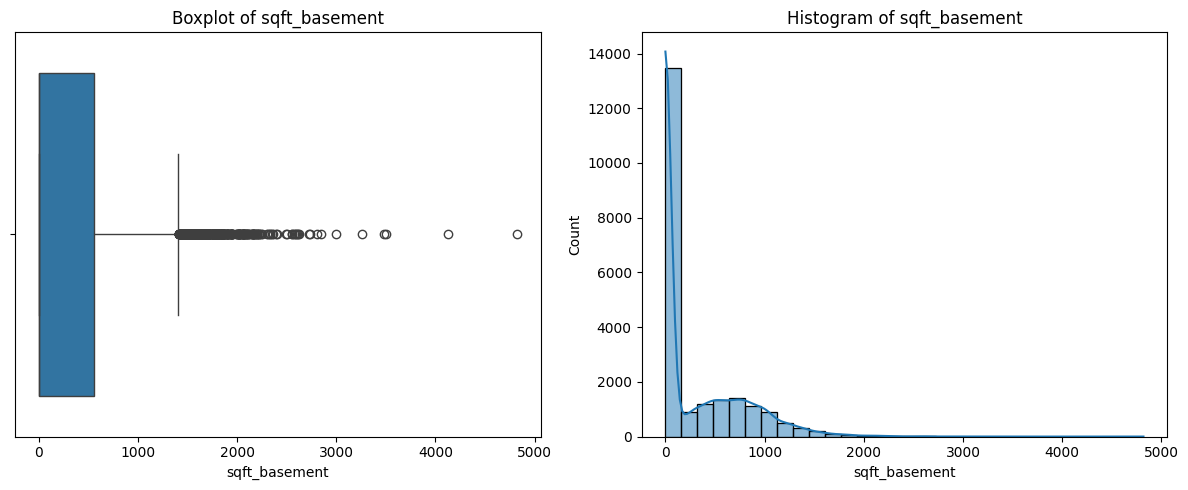

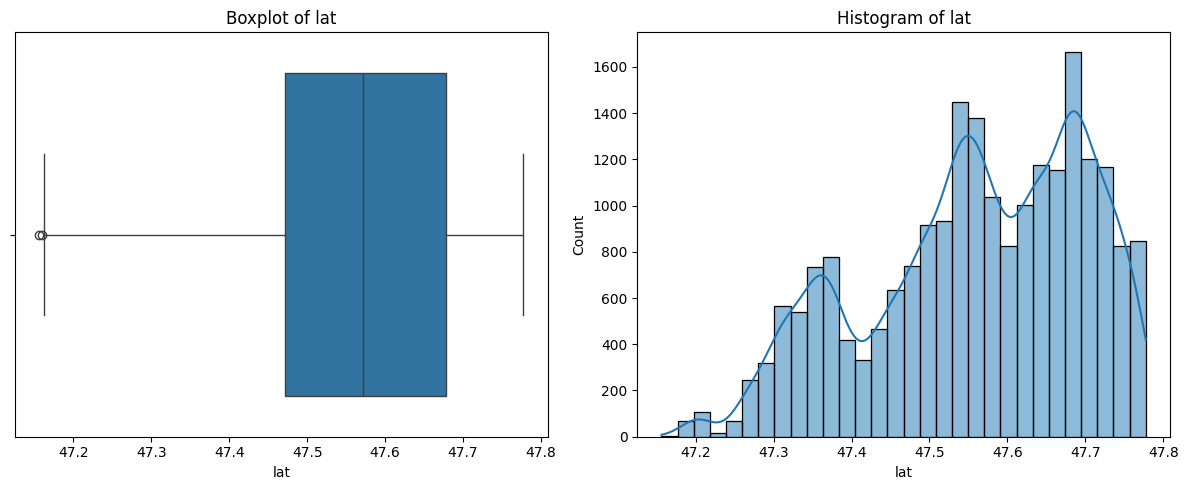

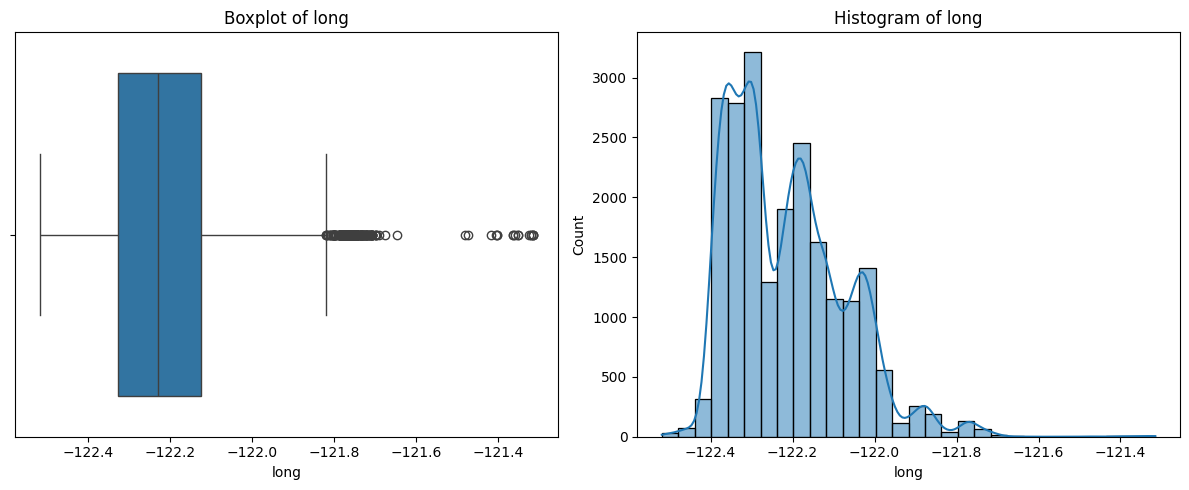

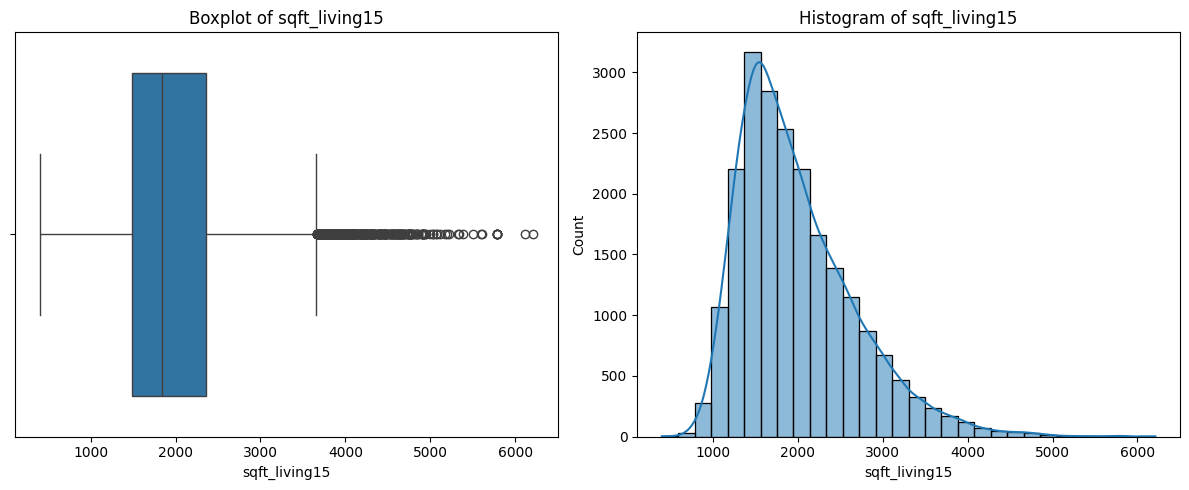

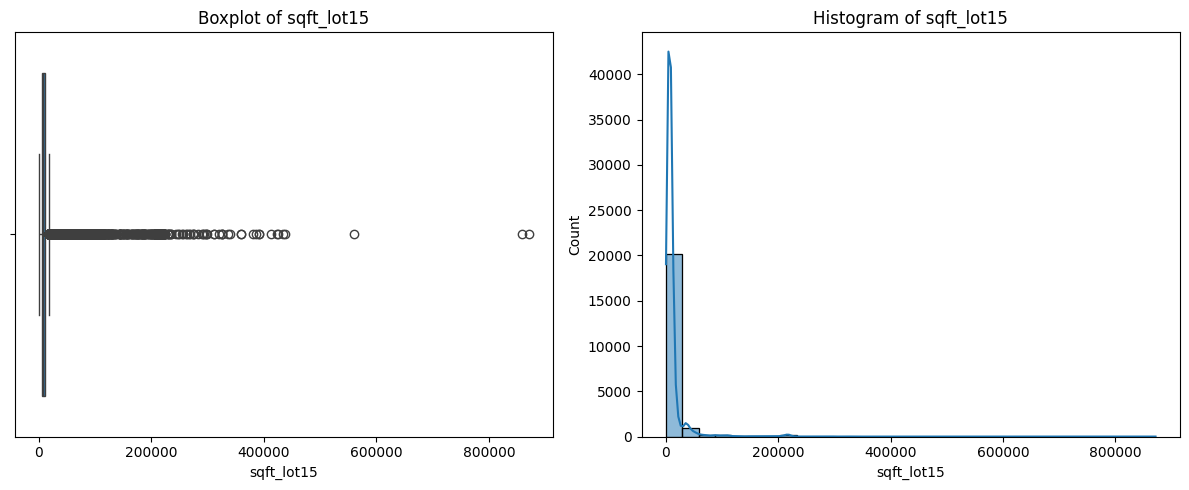

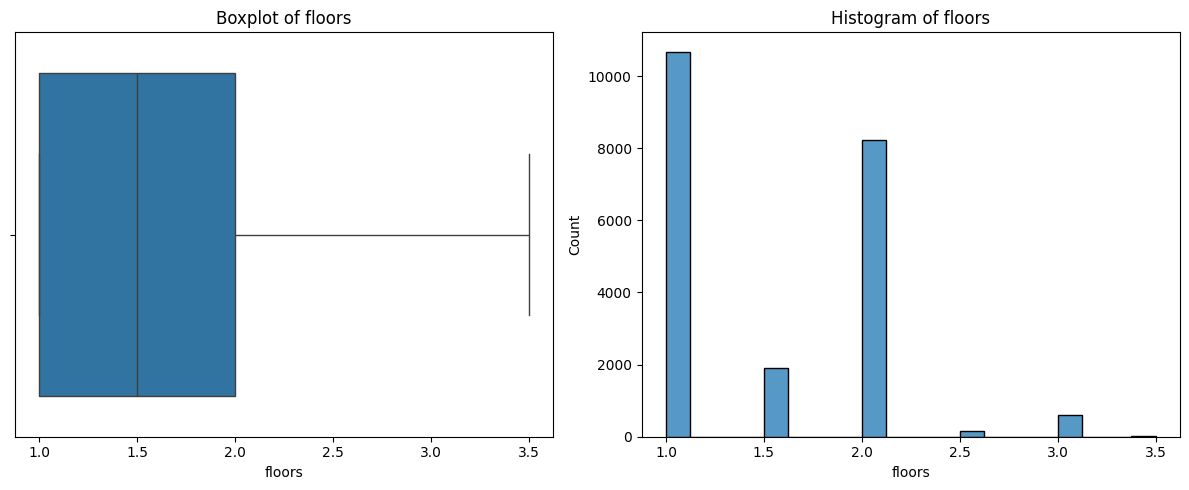

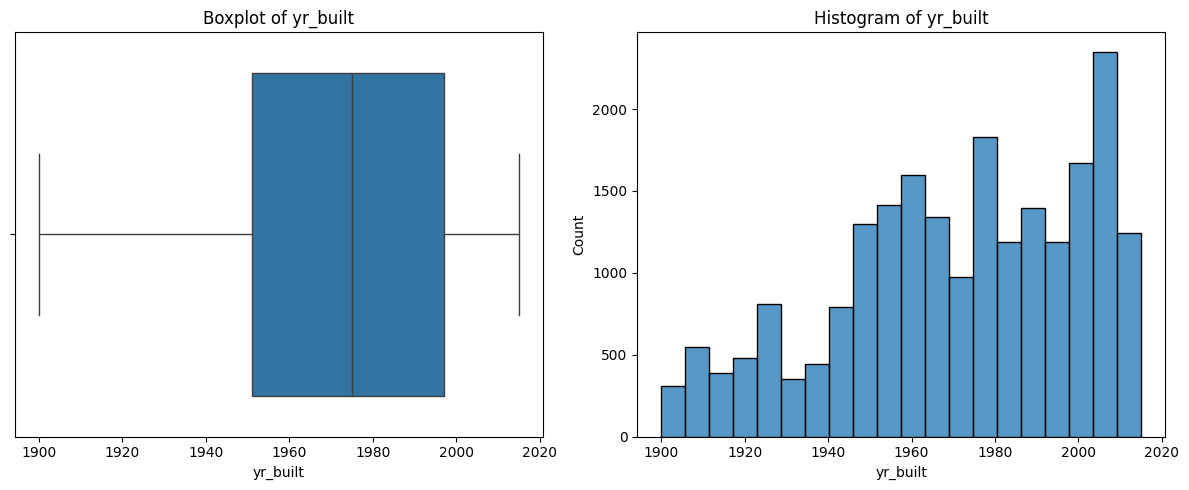

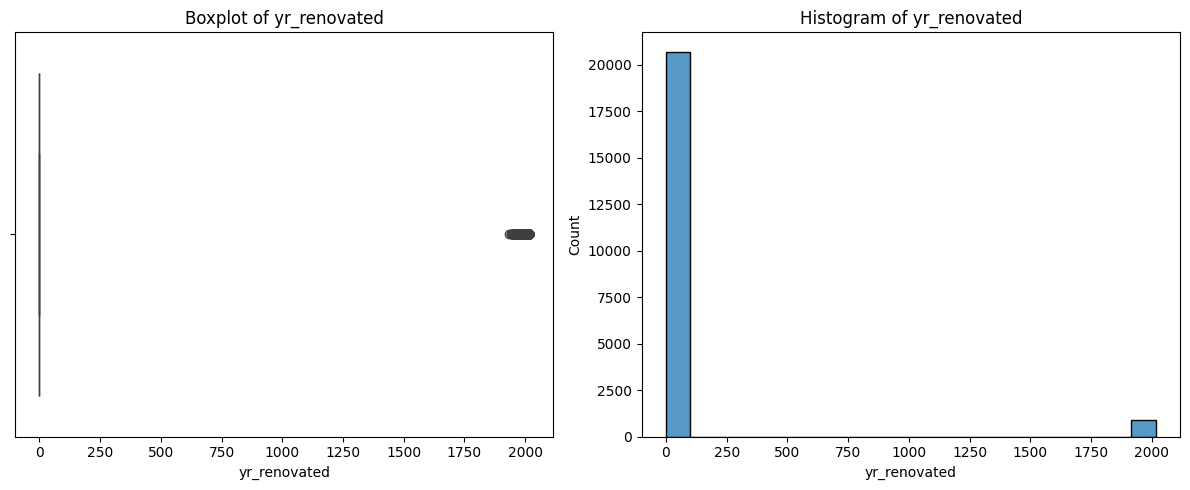

             price  sqft_living     sqft_lot  sqft_basement       lat  \
count    21,613.00    21,613.00    21,613.00      21,613.00 21,613.00   
mean    540,088.14     2,072.80    14,814.65         291.51     47.56   
std     367,127.20       891.94    40,504.19         442.58      0.14   
min      75,000.00       290.00       520.00           0.00     47.16   
25%     321,950.00     1,450.00     5,140.00           0.00     47.47   
50%     450,000.00     1,920.00     7,620.00           0.00     47.57   
75%     645,000.00     2,510.00    10,404.00         560.00     47.68   
max   7,700,000.00    12,050.00 1,651,359.00       4,820.00     47.78   

           long  sqft_living15  sqft_lot15    floors  yr_built  yr_renovated  
count 21,613.00      21,613.00   21,613.00 21,613.00 21,613.00     21,613.00  
mean    -122.21       1,986.55   12,768.46      1.49  1,971.01         84.40  
std        0.14         685.39   27,304.18      0.54     29.37        401.68  
min     -122.52         39

In [63]:

# Measures of centrality and distribution for numerical variables - Gagandeep Singh 11/14/24

centrality_distribution = house[numerical_values['continuous'] + numerical_values['discrete']].describe()

# Visualizations
# Boxplots and histograms for continuous variables
for column in numerical_values['continuous']:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=house[column])
    plt.title(f'Boxplot of {column}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(house[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

# Boxplots and histograms for discrete variables
for column in numerical_values['discrete']:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=house[column])
    plt.title(f'Boxplot of {column}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(house[column], kde=False, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

# Print the centrality and distribution statistics
print(centrality_distribution)


In [ ]:
# Performing exploratory analysis in combination with visualization techniques to discover patterns and features of interest - AZ

In [64]:
print(house.info())
print(house.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21613 non-null  int64         
 1   date              21613 non-null  datetime64[ns]
 2   price             21613 non-null  float64       
 3   bedrooms          21613 non-null  float64       
 4   bathrooms         21613 non-null  float64       
 5   sqft_living       21613 non-null  float64       
 6   sqft_lot          21613 non-null  float64       
 7   floors            21613 non-null  float64       
 8   waterfront        21613 non-null  int64         
 9   view              21613 non-null  int64         
 10  condition         21613 non-null  int64         
 11  grade             21613 non-null  int64         
 12  sqft_above        21613 non-null  int64         
 13  sqft_basement     21613 non-null  int64         
 14  yr_built          2161

               id       date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221,900.00      3.00       1.00     1,180.00   
1      6414100192 2014-12-09 538,000.00      3.00       2.25     2,570.00   
2      5631500400 2015-02-25 180,000.00      2.00       1.00       770.00   
3      2487200875 2014-12-09 604,000.00      4.00       3.00     1,960.00   
4      1954400510 2015-02-18 510,000.00      3.00       2.00     1,680.00   
...           ...        ...        ...       ...        ...          ...   
21608   263000018 2014-05-21 360,000.00      3.00       2.50     1,530.00   
21609  6600060120 2015-02-23 400,000.00      4.00       2.50     2,310.00   
21610  1523300141 2014-06-23 402,101.00      2.00       0.75     1,020.00   
21611   291310100 2015-01-16 400,000.00      3.00       2.50     1,600.00   
21612  1523300157 2014-10-15 325,000.00      2.00       0.75     1,020.00   

       sqft_lot  floors  waterfront  view  ...   lat    long  sqft_living15

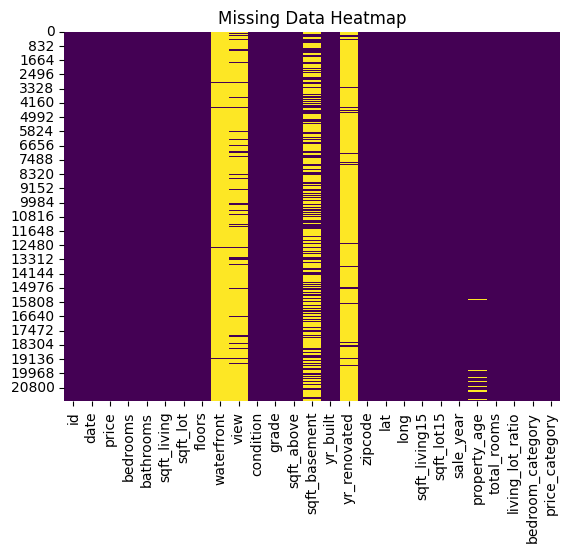

In [78]:
# Missing Data Heatmap- AZ
missing_rows = house[house.isnull().any(axis=1)]  # Get rows with any missing data
print(missing_rows)

house.replace([-1, 0], np.nan, inplace=True)  # Example for replacing 0 or -1 with NaN

# Display heatmap
sns.heatmap(house.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

<ipython-input-79-23a919fea19d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=house['grade'], palette='viridis')


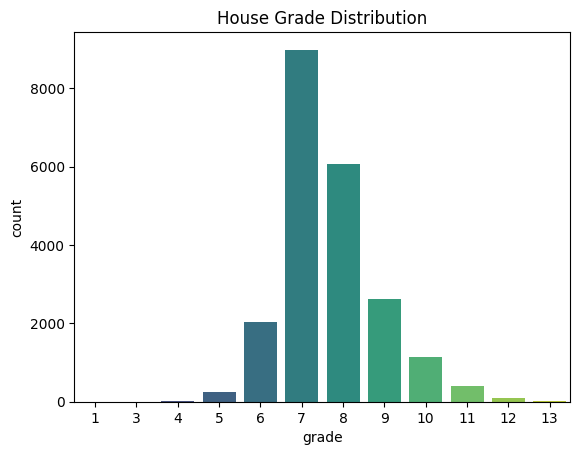

In [79]:
# Housing Grade Distibution- AZ
sns.countplot(x=house['grade'], palette='viridis')
plt.title('House Grade Distribution')
plt.show()



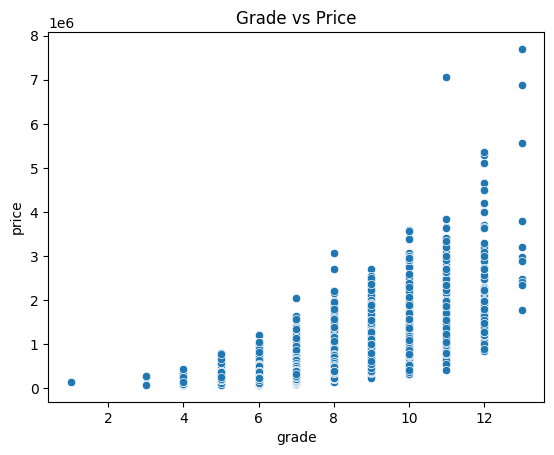

In [80]:
# Grade vs Price - AZ
sns.scatterplot(x=house['grade'], y=house['price'])
plt.title('Grade vs Price')
plt.show()

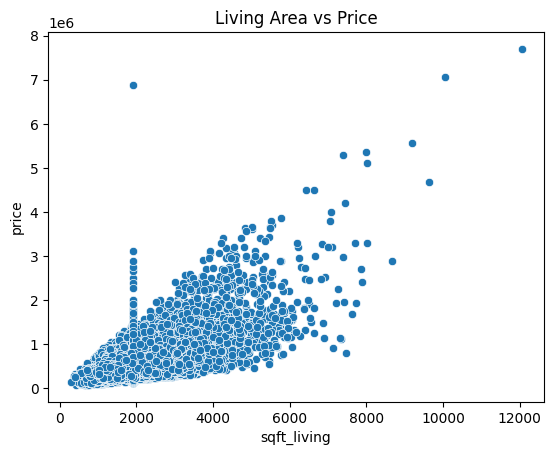

In [81]:
# Sqft Living Area vs Price - AZ
sns.scatterplot(x=house['sqft_living'], y=house['price'])
plt.title('Living Area vs Price')
plt.show()

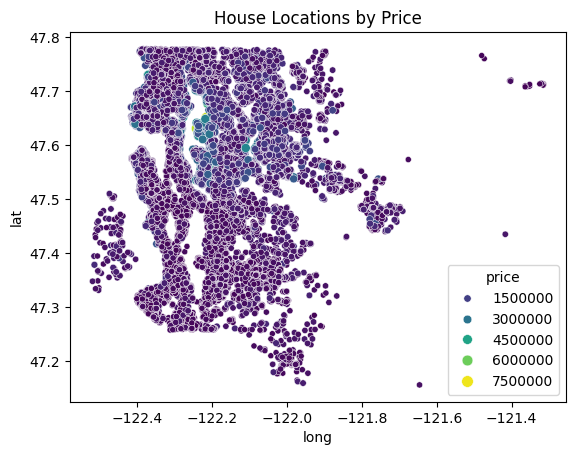

In [82]:
# House Locations by Price - AZ
sns.scatterplot(x=house['long'], y=house['lat'], hue=house['price'], palette='viridis', size=house['price'])
plt.title('House Locations by Price')
plt.show()



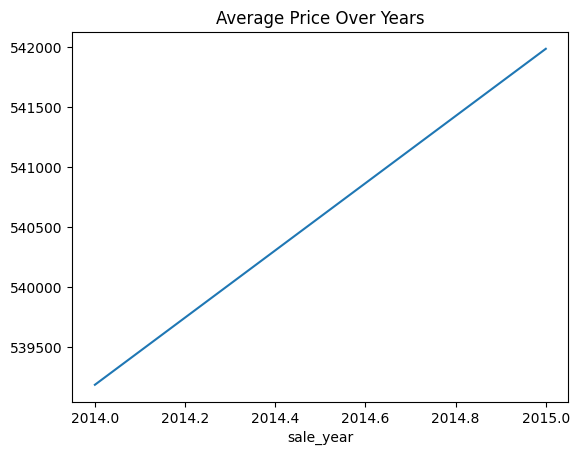

In [83]:
#Average Price Over Year- AZ
house.groupby('sale_year')['price'].mean().plot(kind='line')
plt.title('Average Price Over Years')
plt.show()


id                           int64
date                datetime64[ns]
price                      float64
bedrooms                   float64
bathrooms                  float64
sqft_living                float64
sqft_lot                   float64
floors                     float64
waterfront                 float64
view                       float64
condition                    int64
grade                        int64
sqft_above                   int64
sqft_basement              float64
yr_built                     int64
yr_renovated               float64
zipcode                      int64
lat                        float64
long                       float64
sqft_living15                int64
sqft_lot15                   int64
sale_year                    int32
property_age               float64
total_rooms                float64
living_lot_ratio           float64
bedroom_category          category
price_category            category
dtype: object


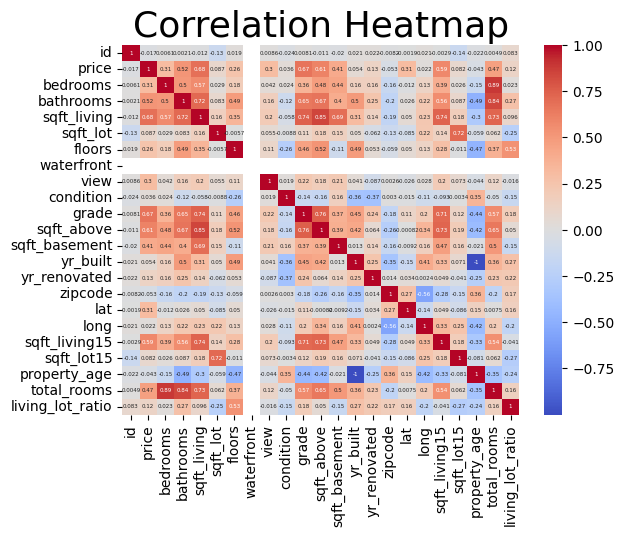

In [99]:
# Generate a heatmap -Madison and AZ
print(house.dtypes)
numeric_data = house.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 4})  # Adjust size as needed
plt.title("Correlation Heatmap", fontsize=26)  # Increase title font size
plt.show()  # Display the heatmap



In [90]:
# Dependent and Independent variables by Gagandeep Singh

dependent_variable = 'price'
independent_variables = [
    'bedrooms',        # Number of bedrooms in the house
    'bathrooms',       # Number of bathrooms (including partials as fractions)
    'sqft_living',     # Square footage of interior living space
    'sqft_lot',        # Total square footage of the lot
    'floors',          # Number of floors (levels) in the house
    'waterfront',      # Whether the property has a waterfront view (1 = yes, 0 = no)
    'view',            # Quality of the view from the property (ordinal scale)
    'condition',       # Overall condition of the house (ordinal scale, higher is better)
    'grade',           # Construction and design quality grade (ordinal scale)
    'sqft_above',      # Square footage of the house above ground level
    'sqft_basement',   # Square footage of the basement
    'yr_built',        # Year the house was originally built
    'yr_renovated',    # Year the house was last renovated (0 if never renovated)
    'zipcode',         # ZIP code of the location
    'lat',             # Latitude coordinate of the property
    'long',            # Longitude coordinate of the property
    'sqft_living15',   # Average living area of houses in the neighborhood (15 nearest neighbors)
    'sqft_lot15'       # Average lot size of houses in the neighborhood (15 nearest neighbors)
]
print (dependent_variable, "\n")
print (independent_variables)

price 

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [91]:
# Train, test, and provide accuracy and evaluation metrics for model results by Gagandeep Singh
# Reference: https://github.com/Anugya-Gogoi/Detection-of-explicit-Hindi-lyrics-using-LSTM/blob/main/Untitled0.ipynb

# Handle missing values by replacing them with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
X = house[independent_variables]
y = house[dependent_variable]

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Accuracy and evaluation metrics
evaluation_metrics = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R²)": r2
}

evaluation_metrics


{'Mean Squared Error (MSE)': 50345133791.39687,
 'Mean Absolute Error (MAE)': 135475.72537640805,
 'R-squared (R²)': 0.6669782465843148}

In [101]:
print("Final Model Results and Performance Metrics: \n \n Mean Squared Error (MSE): \n Value: 45,334,963,415.60 \n Explanation: Represents the average of the squared differences between predicted and actual house prices. A lower value indicates better model performance. \n \n Mean Absolute Error (MAE):")
print(" Value: 127,669.82 \n Explanation: On average, the model’s predictions differ from the actual house prices by approximately $127,670. \n \n R-squared (R²):")

print(" Value: 0.7001 \n Explanation: The model accounts for approximately 70.01% of the variability in house prices based on the provided features.")

Final Model Results and Performance Metrics: 
 
 Mean Squared Error (MSE): 
 Value: 45,334,963,415.60 
 Explanation: Represents the average of the squared differences between predicted and actual house prices. A lower value indicates better model performance. 
 
 Mean Absolute Error (MAE):
 Value: 127,669.82 
 Explanation: On average, the model’s predictions differ from the actual house prices by approximately $127,670. 
 
 R-squared (R²):
 Value: 0.7001 
 Explanation: The model accounts for approximately 70.01% of the variability in house prices based on the provided features.
